In [12]:
filename = {
    'hcn': '../w40_hcn_1-10_sub_-7_20.fits',
    'c18o': '../w40_c18o_1-9_sub_0_12.fits',
    'hcop': '../w40_hcop_1-10_sub_0_15.fits',
    'n2hp': '../w40_n2hp_1-8_sub_-7_17.fits',
    'cn':   '../cn_modified.fits',
    'c2h':  '../w40_c2h_1-8_sub_-50_20.fits',
}

v_range = {
    'hcn': [-7, 20],
    'c18o': [0, 12],
    'hcop': [0, 15],
    'n2hp': [-7, 17],
    'cn':   [-7, 20],
    'c2h':  [-50, 20],
}

In [13]:
from astropy import units as u
from spectral_cube import SpectralCube
import all_functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

/tmp/ipykernel_27242/1327963269.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [14]:
def get_max_point(line):
    vmin, vmax = v_range[line] #define the velocity range
    u.add_enabled_units(u.def_unit(["K (Ta*)"], represents=u.K)) #define the unit K (Tmb) and make it in Kelvin
    cube_c2h = SpectralCube.read(filename[line]) #get the filename of the line and read it.
    sub_cube_slab = cube_c2h.spectral_slab(vmin * u.km / u.s, vmax * u.km / u.s) #limit the spectra cube velocity range to the defined range
    rms = np.sqrt(np.mean(np.square(sub_cube_slab)))
    sigma = np.std(sub_cube_slab.hdu.data)
    print(rms,sigma)
    sub_cube_slab_filtered = sub_cube_slab.with_mask(sub_cube_slab>3*rms*u.K)
    max_point_map = sub_cube_slab_filtered.max(axis=0)
    return max_point_map.hdu.data

First, check the imshow and colorbar for each map.

In [15]:
# fig = plt.figure(figsize=(25,4))
# for i in range(len(filename)):
#     line = list(filename.keys())[i]
#     ax = fig.add_subplot(1,6,i+1)
#     im = ax.imshow(get_max_point(line), origin='lower',interpolation='hanning')
#     plt.colorbar(ax=ax, mappable=im)
#     ax.set_title(line)

Check the best smoothing and lower limit parameter

In [16]:
lower_limit = {
    'hcn': 0.75,
    'c18o': 1.6,
    'hcop': 0.75,
    'n2hp': 0.8,
    'cn':   1.8,
    'c2h':  0.7,
}

smoothing = {
    'hcn': 1,
    'c18o': 1,
    'hcop': 1,
    'n2hp': 1,
    'cn':   1,
    'c2h':  1,
}

In [17]:
# from astropy.wcs import WCS
# from astropy.io import fits
# import warnings
# warnings.filterwarnings("ignore")
# wcs_galactic = WCS(fits.open(filename['c18o'])[0].header).celestial[0:2]
# ax.set_aspect('equal')
# fig = plt.figure(figsize=(20,4))
# for i in range(len(filename)):
#     line = list(filename.keys())[i]
#     ax = fig.add_subplot(1,6,i+1)
#     _map = get_max_point(line)
#     im = ax.imshow(_map, origin='lower',interpolation='hanning')
#     plt.colorbar(ax=ax, mappable=im)
#     mask = _map >= lower_limit[line]
#     smoothed_mask = gaussian_filter(mask.astype(float), sigma=smoothing[line])
#     contour = ax.contour(smoothed_mask, levels=[0.2], colors='red', linewidths=1)
#     ax.set_title(line)

After that, Plot all contour on the same map

In [18]:
def get_smooth_mask(line):
    _map = get_max_point(line)
    mask = _map >= lower_limit[line]
    smoothed_mask = gaussian_filter(mask.astype(float), sigma=1)
    return smoothed_mask

In [19]:
def get_wcs(line):
    wcs = WCS(fits.open(filename[line])[0].header).celestial[0:2]
    return wcs

In [20]:
from astropy import units as u

# Define the angular size in arcseconds
angle = 3.11 * u.arcmin  # Change 100.0 to your desired angular size

# Define the distance in parsecs
distance_pc = 500 * u.pc  # Change 440.7 to your actual distance

# Convert from arcseconds to parsecs using the formula
parsecs_value = distance_pc * angle.to(u.rad).value

angular_size = 2 * np.arctan(0.5 * u.pc / (500 * u.pc))

# Print the result
print(angular_size.to(u.arcmin))

6.875491249740074 arcmin


0.35633533295700565 0.3501434794330088


/home/mingkang/.local/lib/python3.10/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


0.17599638923894967 0.1753476055986882


/home/mingkang/.local/lib/python3.10/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


0.15130130296509778 0.15130113859219668


/home/mingkang/.local/lib/python3.10/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


0.16583867364796734 0.16471395618586052


/home/mingkang/.local/lib/python3.10/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


0.41954908 0.4193988


/home/mingkang/.local/lib/python3.10/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


0.14526326919685628 0.1452612942158362


/home/mingkang/.local/lib/python3.10/site-packages/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


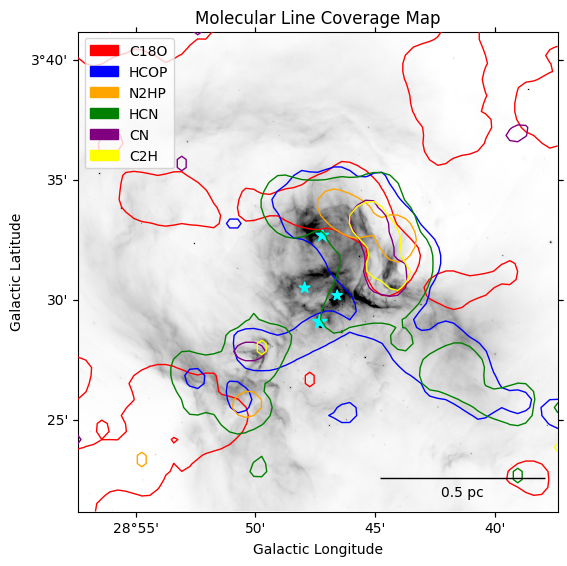

In [21]:
from astropy.wcs import WCS
from astropy.io import fits

wcs_galactic = WCS(fits.open(filename['c18o'])[0].header).celestial[0:2]
# path = "w40_wise12_continuum.fits"
# wcs_celestial = WCS(fits.open(path)[0].header)
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8], projection=wcs_galactic)
ax.set_aspect('equal')
import all_functions
all_functions.spitzer_on_galactic2(ax,cmap='gray_r',vmax=1000)
ax.contour(get_smooth_mask('c18o'), levels=[0.2], colors='red', linewidths=1, transform=ax.get_transform(get_wcs('c18o')))
ax.contour(get_smooth_mask('hcop'), levels=[0.2], colors='blue', linewidths=1, transform=ax.get_transform(get_wcs('hcop')))
ax.contour(get_smooth_mask('n2hp'), levels=[0.2], colors='orange', linewidths=1, transform=ax.get_transform(get_wcs('n2hp')))
ax.contour(get_smooth_mask('hcn'), levels=[0.2], colors='green', linewidths=1, transform=ax.get_transform(get_wcs('hcn')))
ax.contour(get_smooth_mask('cn'), levels=[0.2], colors='purple', linewidths=1, transform=ax.get_transform(get_wcs('cn')))
ax.contour(get_smooth_mask('c2h'), levels=[0.2], colors='yellow', linewidths=1, transform=ax.get_transform(get_wcs('c2h')))

import all_functions
all_functions.plot_irs_sources(ax,wcs_galactic, (0,60), (0,60),scale=60,opacity=1,color='cyan')

from astropy.visualization import wcsaxes
wcsaxes.add_scalebar(ax=ax, length=6.88 * u.arcmin, label='0.5 pc')
ax.set_ylabel('Galactic Latitude')
ax.set_xlabel('Galactic Longitude')
ax.set_title('Molecular Line Coverage Map')
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='red', label='C18O'),
    mpatches.Patch(color='blue', label='HCOP'),
    mpatches.Patch(color='orange', label='N2HP'),
    mpatches.Patch(color='green', label='HCN'),
    mpatches.Patch(color='purple', label='CN'),
    mpatches.Patch(color='yellow', label='C2H'),
]

# Create the legend with the custom handles and labels
plt.legend(handles=legend_handles, loc='upper left')
plt.savefig('coverage_map.png', format='png',bbox_inches='tight')